# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('base_de_dados.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [6]:
df.loc[df['APGAR5'] <= 3, 'APGAR5_CAT'] = 'asfixia grave'
df.loc[(df['APGAR5'] > 3) & (df['APGAR5'] <= 5), 'APGAR5_CAT'] = 'asfixia moderada'
df.loc[(df['APGAR5'] > 5) & (df['APGAR5'] <= 7), 'APGAR5_CAT'] = 'asfixia leve'
df.loc[(df['APGAR5'] > 7) & (df['APGAR5'] <= 10), 'APGAR5_CAT'] = 'normal'
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,APGAR5_CAT
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

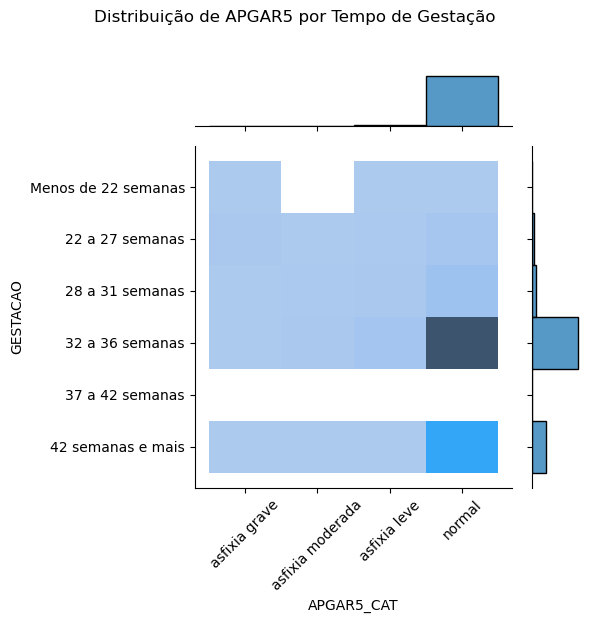

In [76]:
ordem_gestacao = ['Menos de 22 semanas','22 a 27 semanas','28 a 31 semanas','32 a 36 semanas','37 a 42 semanas','42 semanas e mais']
ordem_apgar5 = ['asfixia grave','asfixia moderada','asfixia leve','normal']

df['GESTACAO'] = pd.Categorical(df['GESTACAO'], categories=ordem_gestacao, ordered=True)
df['APGAR5_CAT'] = pd.Categorical(df['APGAR5_CAT'], categories=ordem_apgar5, ordered=True)

g = sns.jointplot(x='APGAR5_CAT', y='GESTACAO', data=df, kind='hist', bins=[4, 6])
plt.setp(g.ax_joint.get_xticklabels(), rotation=45)

g.fig.suptitle('Distribuição de APGAR5 por Tempo de Gestação', y=1.03)

plt.tight_layout()

plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [68]:
freq = pd.crosstab(df['GESTACAO'],df['APGAR5'])
freq

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [80]:
freq_pctlin = freq.div(freq.sum(axis=0),axis=1)
freq_pctlin

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
Menos de 22 semanas,0.090909,0.0,0.076923,0.000000,0.000000,0.000000,0.000000,0.012048,0.000000,0.001660,0.001408
22 a 27 semanas,0.636364,0.0,0.615385,0.666667,0.071429,0.000000,0.074074,0.120482,0.048880,0.010515,0.011268
28 a 31 semanas,0.000000,0.0,0.153846,0.111111,0.357143,0.368421,0.259259,0.132530,0.124236,0.030437,0.018310
32 a 36 semanas,0.181818,1.0,0.153846,0.222222,0.571429,0.578947,0.629630,0.674699,0.737271,0.723298,0.654930
42 semanas e mais,0.090909,0.0,0.000000,0.000000,0.000000,0.052632,0.037037,0.060241,0.089613,0.234090,0.314085


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

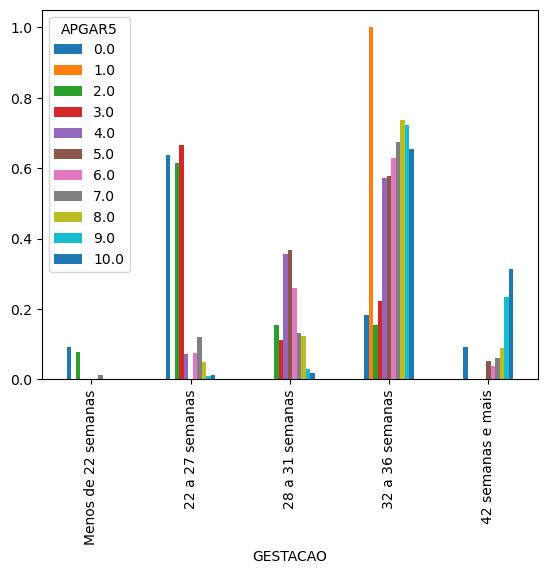

In [82]:
freq_pctlin.plot.bar()

Podemos verificar em dois casos:

- No conjunto de dados onde temos de 32 a 36 semanas, ha muitos casos de asfixia infantil, tendo um pico para APGAR5 igual a 1.0, indicando que o parto tenha sido prematuro. Alem disso verifique que os casos onde a crianca nasce com classificacao normal (entre APGAR5 igual a 9 e 10), sao apenas o terceiro e quinto mais frequentes.
- No conjunto de dados onde temos 42 semanas e mais os casos mais frequentes sao os que a crianca nasce com a classificacao normal, enquanto que os casos que vao de leve a grave sao menos frequentes.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

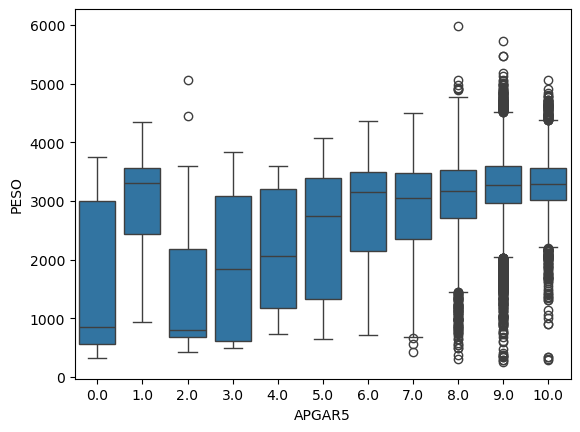

In [96]:
ax = sns.boxplot(data = df, y='PESO', x='APGAR5', orient='v')

Observaremos alguns pontos importantes:
- Entre APGAR5 igual a 8 e 10, a distribuicao de peso permanece aproximadamente em torno de pouco mais de 3000 gramas. Note tambem que os valores do primeiro e terceiro quartis estao bem proximos um do outro, fazendo com que os dados apresentados para estes parametros sejam bastante consistentes. Observe tambem os limites superior e inferior, que estao mais proximos um do outro, porem com um distanciamento maior a partir de APGAR5 igual a 8, mostrando que nascidos com peso acima ou abaixo da mediana podem nascer com classificacao normal para asfixia. Valores discrepantes tambem sao observados para este intervalo.
- Para APGAR5 menor que 8 vemos o valor da mediana decrescendo a partir de aproximadamente 3000 gramas ate abaixo dos 1000 gramas para APGAR5 igual a 0, sendo observada uma mediana anomala para APGAR5 igual a 1 com um valor acima dos 3000 gramas. Notamos tambem que a distancia entre o primeiro e o terceiro quartil tende a aumentar com a reducao de APGAR5, com enfase na reducao do valor para o primeiro quartil com a reducao do APGAR5, ainda com APGAR5 igual a 1 apresentando um comportamento anomalo. Notemos tambem que os limites inferior e superior tendem a apresentarem valores mais proximos aos seus quartis mais proximos.

Dessa forma concluimos que a asfixia depende do peso de forma que ao confrontarmos com os valores de APGAR5 as suas medianas tendem a reduzir seu valor com a reducao do valor desta variavel, porem apresentando um comportamento anomalo para APGAR5 igual a 1.